In [41]:
from src.preprocessing import final_df
from src.models_functions import ts_pipeline, ml_pipeline, custom_train_test, lstm, prophet_predict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import warnings
import numpy as np

warnings.filterwarnings('ignore')
rcParams["figure.figsize"] = 18, 6

In [42]:
# Selecionar a ação

stock = 'petr4'
stock = stock.upper()

In [43]:
# Criar Objetos DataFrame e Series

df = final_df(stock)

series = pd.Series(df[f"Close {stock}"])

y_train, y_test = custom_train_test(series)

In [44]:
ts_results = ts_pipeline(series)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1023.263, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1024.634, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1025.060, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1024.925, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1027.501, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1021.221, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1023.876, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1020.083, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1021.171, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1024.364, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1022.719, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.669 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[21] intercept   : AIC=1027.162, Time=8.89 sec
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=1

In [45]:
prophet_dict = prophet_predict(series)

23:05:48 - cmdstanpy - INFO - Chain [1] start processing
23:05:48 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
ml_results = ml_pipeline(df, stock)

Treinando DecisionTree...
Treinando RandomForest...
Treinando XGBoost...
Treinando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 1865, number of used features: 10
[LightGBM] [Info] Start training from score 11.943171


In [47]:
lstm_dict = lstm(df, stock)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0923 - val_loss: 0.3272
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - val_loss: 0.1565
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 - val_loss: 0.0665
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - val_loss: 0.0137
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 6.0672e-04
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0346e-04 - val_loss: 5.0907e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7489e-04 - val_loss: 6.7832e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5020e-04 - val_loss: 7.9094e-04
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5340e-04 - val_loss: 6.8946e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5112e-04 - val_loss: 7.4193e-04
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4990e-04 - val_loss: 6.4624e-04
Epoch 12/50
59/59 ━━━━

In [48]:
neat_models_info = []

neat_models_info.append({
    "Nome do Modelo": lstm_dict["nome"],
    "Previsão": lstm_dict["predict"],
    "MAPE - Base de Teste": lstm_dict["mape_test"]
})

neat_models_info.append({
    "Nome do Modelo": prophet_dict["nome"],
    "Previsão": prophet_dict["predict"],
    "MAPE - Base de Teste": prophet_dict["mape_test"]
})

for model_name, model_info in ml_results.items():
    neat_models_info.append({
        "Nome do Modelo": model_name,
        "Previsão": model_info["predict"],
        "MAPE - Base de Teste": model_info["mape_test"]
    })

for _, row in ts_results.iterrows():
    neat_models_info.append({
        "Nome do Modelo": row["Nome do Modelo"],
        "Previsão": row["Previsão"],
        "MAPE - Base de Teste": row["MAPE"]
    })


In [49]:
neat_models_df = pd.DataFrame(neat_models_info)

In [50]:
neat_models_df["Previsão"] = neat_models_df["Previsão"].apply(lambda x: np.array(x).reshape(-1))

In [51]:
neat_models_df = neat_models_df.sort_values(by="MAPE - Base de Teste", ascending=True)

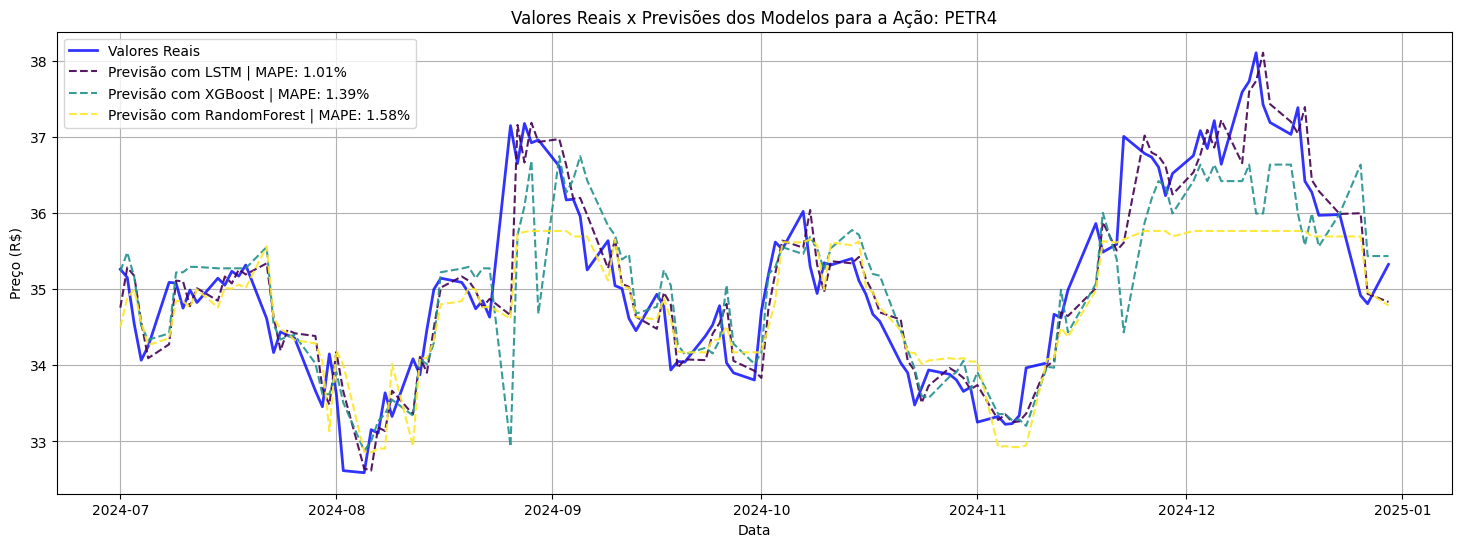

In [52]:
# Plotando as previsões dos top n modelos

top_n = 3  # Configurar parâmetro

plt.plot(y_test.index, y_test, label="Valores Reais", linewidth=2, color='blue', alpha=0.8)
colors = cm.viridis(np.linspace(0, 1, top_n))

for i, (_, row) in enumerate(neat_models_df[:top_n].iterrows()):
    nome_modelo = row["Nome do Modelo"]
    previsao = row["Previsão"]
    plt.plot(y_test.index, previsao, label=f'Previsão com {nome_modelo} | MAPE: {row["MAPE - Base de Teste"] * 100:.2f}%', linestyle='--', color=colors[i], alpha=0.9)

plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.title(f"Valores Reais x Previsões dos Modelos para a Ação: {stock}")
plt.legend()
plt.grid()
plt.show()

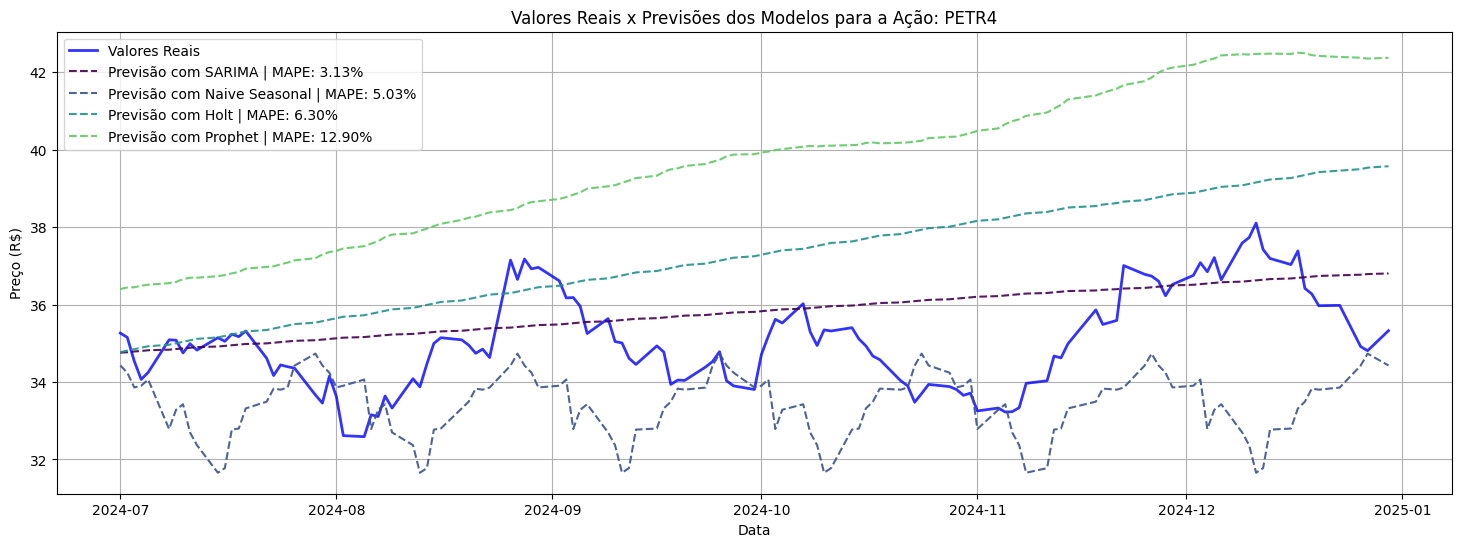

In [53]:
# Plotando as previsões dos bottom n modelos

top_n = 5  # Configurar parâmetro
bottom_n = -top_n

plt.plot(y_test.index, y_test, label="Valores Reais", linewidth=2, color='blue', alpha=0.8)
colors = cm.viridis(np.linspace(0, 1, top_n))

for i, (_, row) in enumerate(neat_models_df[bottom_n:-1].iterrows()):
    nome_modelo = row["Nome do Modelo"]
    previsao = row["Previsão"]
    plt.plot(y_test.index, previsao, label=f'Previsão com {nome_modelo} | MAPE: {row["MAPE - Base de Teste"] * 100:.2f}%', linestyle='--', color=colors[i], alpha=0.9)

plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.title(f"Valores Reais x Previsões dos Modelos para a Ação: {stock}")
plt.legend()
plt.grid()
plt.show()

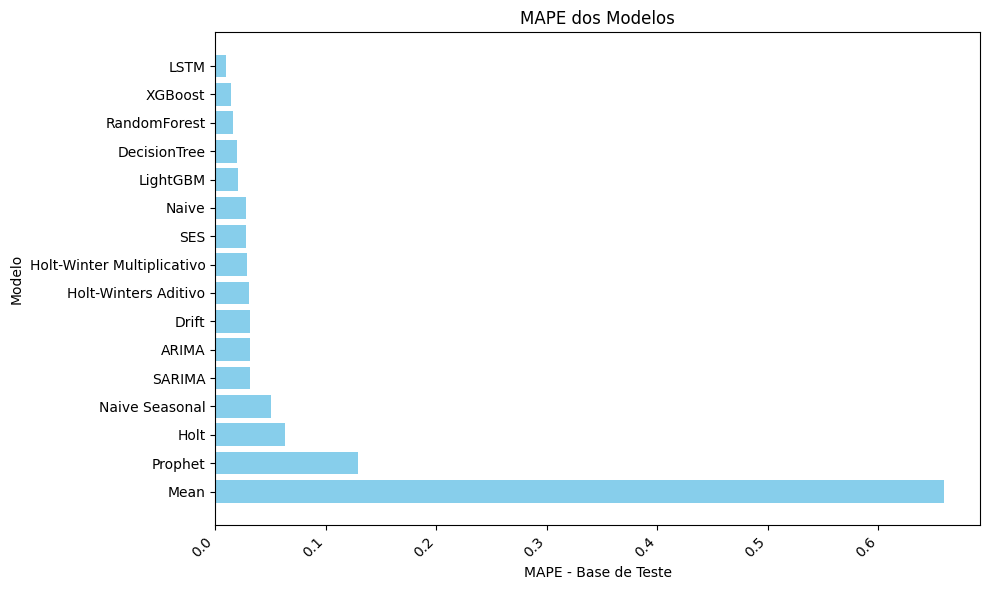

In [54]:
# Plotando os MAPES

plt.figure(figsize=(10,6))
plt.barh(neat_models_df["Nome do Modelo"], neat_models_df["MAPE - Base de Teste"], color='skyblue')

plt.xlabel("MAPE - Base de Teste")
plt.ylabel("Modelo")
plt.title("MAPE dos Modelos")
plt.xticks(rotation=45, ha='right')  # gira os nomes para melhor leitura
plt.gca().invert_yaxis()
plt.tight_layout()